# Experiement: First Round | 0.1%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_01.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  95185  15058       2     172    89.0    135     80            2     1   
1   8519  23286       1     159   107.0    120     80            3     3   
2  90505  20482       2     177    80.0    120     80            1     1   
3   5817  21896       1     174    74.0    130     70            2     2   
4  88938  20470       1     163    80.0    140     90            2     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34715 entries, 0 to 34714
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           34715 non-null  int64  
 1   age          34715 non-null  int64  
 2   gender       34715 non-null  int64  
 3   height       34715 non-null  int64  
 4   weight       34715 non-null  float64
 5   ap_hi        34715 non-null  int64  
 6   ap_lo        34715 non-null  int64  
 7   cholesterol  34715 non-null  int64  
 8   gluc         34715 non-null  int64  
 9   smoke        34715 non-null  int64  
 10  alco         34715 non-null  int64  
 11  active       34715 non-null  int64  
 12  cardio       34715 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.4 MB


0    34679
1       36
Name: cardio, dtype: int64

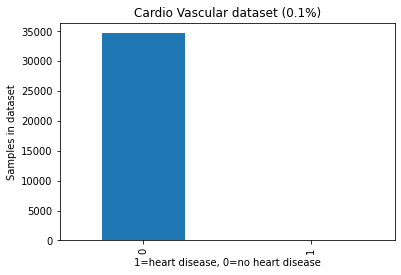

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (0.1%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 36/34715 = 0,001370

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
15827  45780  19157       2     165    70.0    120     80            1     1   
2225    7203  21352       2     169    60.0    120     80            1     1   
10707  31108  21791       1     167    78.0    120     70            1     1   
30508  87820  21003       1     151    87.0     90     60            1     1   
24708  71277  18222       1     165    63.0     90     60            1     1   

       smoke  alco  active  
15827      0     0       1  
2225       1     0       0  
10707      0     0       1  
30508      0     0       1  
24708      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27743
           1       0.00      0.00      0.00        29

    accuracy                           1.00     27772
   macro avg       0.50      0.50      0.50     27772
weighted avg       1.00      1.00      1.00     27772



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       0.00      0.00      0.00         7

    accuracy                           1.00      6943
   macro avg       0.50      0.50      0.50      6943
weighted avg       1.00      1.00      1.00      6943



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.560


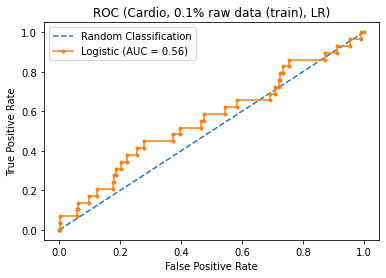

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.372


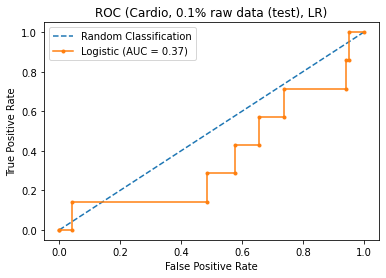

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27743
           1       0.00      0.00      0.00        29

    accuracy                           1.00     27772
   macro avg       0.50      0.50      0.50     27772
weighted avg       1.00      1.00      1.00     27772



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       0.00      0.00      0.00         7

    accuracy                           1.00      6943
   macro avg       0.50      0.50      0.50      6943
weighted avg       1.00      1.00      1.00      6943



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.004


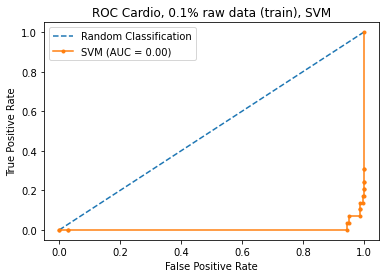

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.771


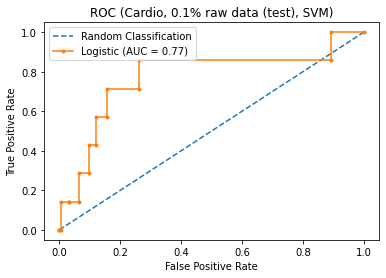

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.00104	validation_0-logloss:0.59858	validation_1-error:0.00101	validation_1-logloss:0.59853
[1]	validation_0-error:0.00104	validation_0-logloss:0.52110	validation_1-error:0.00101	validation_1-logloss:0.52107
[2]	validation_0-error:0.00104	validation_0-logloss:0.45645	validation_1-error:0.00101	validation_1-logloss:0.45644
[3]	validation_0-error:0.00104	validation_0-logloss:0.40187	validation_1-error:0.00101	validation_1-logloss:0.40186
[4]	validation_0-error:0.00104	validation_0-logloss:0.35529	validation_1-error:0.00101	validation_1-logloss:0.35524
[5]	validation_0-error:0.00104	validation_0-logloss:0.31512	validation_1-error:0.00101	validation_1-logloss:0.31509
[6]	validation_0-error:0.00104	validation_0-logloss:0.28033	validation_1-error:0.00101	validation_1-logloss:0.28026
[7]	validation_0-error:0.00104	validation_0-logloss:0.24997	validation_1-error:0.00101	validation_1-logloss:0.24990
[8]	validation_0-error:0.00104	validation_0-logloss:0.22337	validation_1

[71]	validation_0-error:0.00104	validation_0-logloss:0.00606	validation_1-error:0.00101	validation_1-logloss:0.00777
[72]	validation_0-error:0.00104	validation_0-logloss:0.00597	validation_1-error:0.00101	validation_1-logloss:0.00772
[73]	validation_0-error:0.00104	validation_0-logloss:0.00592	validation_1-error:0.00101	validation_1-logloss:0.00773
[74]	validation_0-error:0.00104	validation_0-logloss:0.00584	validation_1-error:0.00101	validation_1-logloss:0.00777
[75]	validation_0-error:0.00104	validation_0-logloss:0.00579	validation_1-error:0.00101	validation_1-logloss:0.00778
[76]	validation_0-error:0.00104	validation_0-logloss:0.00575	validation_1-error:0.00101	validation_1-logloss:0.00781
[77]	validation_0-error:0.00104	validation_0-logloss:0.00570	validation_1-error:0.00101	validation_1-logloss:0.00783
[78]	validation_0-error:0.00104	validation_0-logloss:0.00565	validation_1-error:0.00101	validation_1-logloss:0.00784
[79]	validation_0-error:0.00104	validation_0-logloss:0.00557	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27743
           1       0.00      0.00      0.00        29

    accuracy                           1.00     27772
   macro avg       0.50      0.50      0.50     27772
weighted avg       1.00      1.00      1.00     27772



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       0.00      0.00      0.00         7

    accuracy                           1.00      6943
   macro avg       0.50      0.50      0.50      6943
weighted avg       1.00      1.00      1.00      6943



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.973


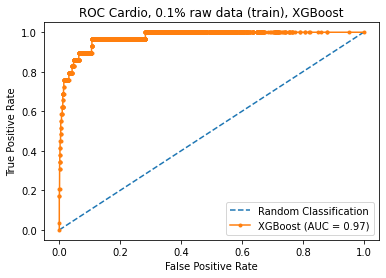

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.757


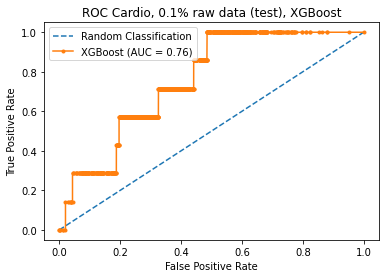

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
15827  45780  19157       2     165    70.0    120     80            1     1   
2225    7203  21352       2     169    60.0    120     80            1     1   
10707  31108  21791       1     167    78.0    120     70            1     1   
30508  87820  21003       1     151    87.0     90     60            1     1   
24708  71277  18222       1     165    63.0     90     60            1     1   

       smoke  alco  active  cardio  
15827      0     0       1       0  
2225       1     0       0       0  
10707      0     0       1       0  
30508      0     0       1       0  
24708      0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

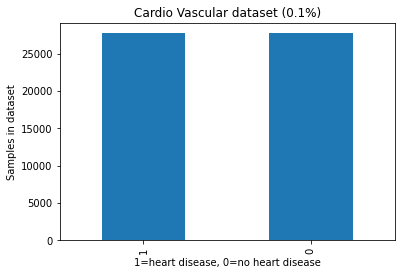

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (0.1%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     27743
           1       0.66      0.68      0.67     27743

    accuracy                           0.67     55486
   macro avg       0.67      0.67      0.67     55486
weighted avg       0.67      0.67      0.67     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      6936
           1       0.00      0.57      0.00         7

    accuracy                           0.64      6943
   macro avg       0.50      0.61      0.39      6943
weighted avg       1.00      0.64      0.78      6943



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.731


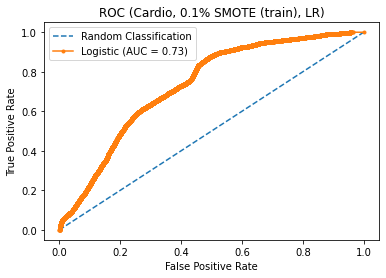

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.609


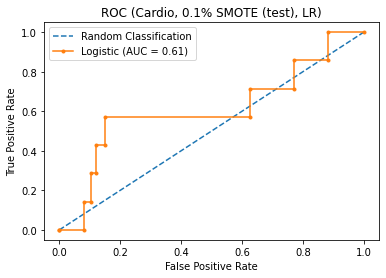

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     27743
           1       0.90      0.99      0.94     27743

    accuracy                           0.94     55486
   macro avg       0.95      0.94      0.94     55486
weighted avg       0.95      0.94      0.94     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      6936
           1       0.00      0.00      0.00         7

    accuracy                           0.89      6943
   macro avg       0.50      0.45      0.47      6943
weighted avg       1.00      0.89      0.94      6943



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.976


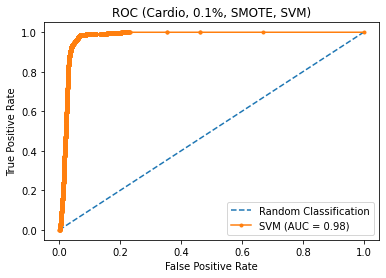

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.334


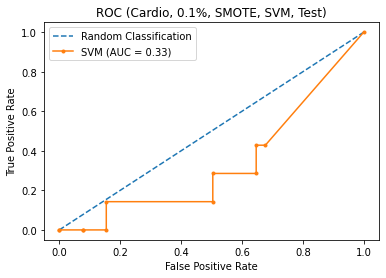

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.14449	validation_0-logloss:0.63912	validation_1-error:0.24615	validation_1-logloss:0.64032
[1]	validation_0-error:0.13265	validation_0-logloss:0.59531	validation_1-error:0.22440	validation_1-logloss:0.59774
[2]	validation_0-error:0.12544	validation_0-logloss:0.55781	validation_1-error:0.11594	validation_1-logloss:0.56181
[3]	validation_0-error:0.11844	validation_0-logloss:0.52510	validation_1-error:0.13366	validation_1-logloss:0.53131
[4]	validation_0-error:0.10567	validation_0-logloss:0.49589	validation_1-error:0.13697	validation_1-logloss:0.50235
[5]	validation_0-error:0.11042	validation_0-logloss:0.47289	validation_1-error:0.14043	validation_1-logloss:0.48131
[6]	validation_0-error:0.10540	validation_0-logloss:0.45028	validation_1-error:0.12977	validation_1-logloss:0.45911
[7]	validation_0-error:0.10352	validation_0-logloss:0.42543	validation_1-error:0.13092	validation_1-logloss:0.43528
[8]	validation_0-error:0.09797	validation_0-logloss:0.40544	validation_1

[71]	validation_0-error:0.02410	validation_0-logloss:0.10992	validation_1-error:0.04350	validation_1-logloss:0.12350
[72]	validation_0-error:0.02381	validation_0-logloss:0.10904	validation_1-error:0.04292	validation_1-logloss:0.12255
[73]	validation_0-error:0.02375	validation_0-logloss:0.10829	validation_1-error:0.04278	validation_1-logloss:0.12187
[74]	validation_0-error:0.02350	validation_0-logloss:0.10737	validation_1-error:0.04306	validation_1-logloss:0.12102
[75]	validation_0-error:0.02278	validation_0-logloss:0.10627	validation_1-error:0.04191	validation_1-logloss:0.11982
[76]	validation_0-error:0.02273	validation_0-logloss:0.10574	validation_1-error:0.04206	validation_1-logloss:0.11919
[77]	validation_0-error:0.02253	validation_0-logloss:0.10409	validation_1-error:0.04119	validation_1-logloss:0.11743
[78]	validation_0-error:0.02249	validation_0-logloss:0.10342	validation_1-error:0.04105	validation_1-logloss:0.11677
[79]	validation_0-error:0.02233	validation_0-logloss:0.10253	val

[141]	validation_0-error:0.01188	validation_0-logloss:0.05603	validation_1-error:0.02132	validation_1-logloss:0.06907
[142]	validation_0-error:0.01186	validation_0-logloss:0.05529	validation_1-error:0.02132	validation_1-logloss:0.06839
[143]	validation_0-error:0.01162	validation_0-logloss:0.05494	validation_1-error:0.02088	validation_1-logloss:0.06802
[144]	validation_0-error:0.01157	validation_0-logloss:0.05428	validation_1-error:0.02074	validation_1-logloss:0.06755
[145]	validation_0-error:0.01144	validation_0-logloss:0.05382	validation_1-error:0.02074	validation_1-logloss:0.06709
[146]	validation_0-error:0.01146	validation_0-logloss:0.05360	validation_1-error:0.02045	validation_1-logloss:0.06683
[147]	validation_0-error:0.01148	validation_0-logloss:0.05334	validation_1-error:0.02060	validation_1-logloss:0.06659
[148]	validation_0-error:0.01134	validation_0-logloss:0.05291	validation_1-error:0.02031	validation_1-logloss:0.06618
[149]	validation_0-error:0.01112	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27743
           1       0.99      1.00      0.99     27743

    accuracy                           0.99     55486
   macro avg       0.99      0.99      0.99     55486
weighted avg       0.99      0.99      0.99     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6936
           1       0.00      0.00      0.00         7

    accuracy                           0.98      6943
   macro avg       0.50      0.49      0.50      6943
weighted avg       1.00      0.98      0.99      6943



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=1.000


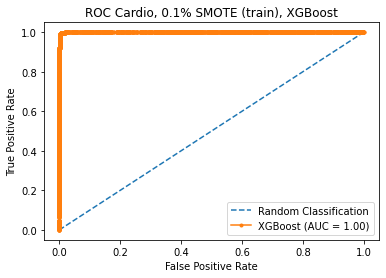

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.424


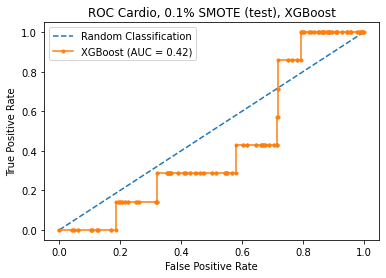

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1       29
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1       29
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
tvae_result_df_0 = tvae_result_df[tvae_result_df['cardio'] == 0]
train_df_0_sm = tvae_result_df_0.sample(n = 100)
train_df_sm = train_df_0_sm.append(tvae_result_df_1)
train_df_sm['cardio'].value_counts()

0    100
1     29
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(train_df_sm)
samples = tvae.sample(100)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_0 = pd.concat([train_df_sm,samples])
tvae_sm_0['cardio'].value_counts()

0    100
1     67
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_sm_0)
samples = tvae.sample(100)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1 = pd.concat([tvae_sm_0,samples])
tvae_sm_1['cardio'].value_counts()

0    100
1     87
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_sm_1)
samples = tvae.sample(150)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2 = pd.concat([tvae_sm_1,samples])
tvae_sm_2['cardio'].value_counts()

1    144
0    100
Name: cardio, dtype: int64

In [47]:
tvae = TVAE()

tvae.fit(tvae_sm_2)
samples = tvae.sample(250)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_3 = pd.concat([tvae_sm_2,samples])
tvae_sm_3['cardio'].value_counts()

1    187
0    100
Name: cardio, dtype: int64

In [48]:
tvae_result_df_sm_1 = tvae_sm_3[tvae_sm_3['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 500)
train_df_sm1 = train_df_0_med.append(tvae_result_df_sm_1)
train_df_sm1['cardio'].value_counts()

0    500
1    187
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(train_df_sm1)
samples = tvae.sample(250)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1_0 = pd.concat([train_df_sm1,samples])
tvae_sm_1_0['cardio'].value_counts()

0    500
1    221
Name: cardio, dtype: int64

In [56]:
tvae = TVAE()

tvae.fit(tvae_sm_1_0)
samples = tvae.sample(200)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1_1 = pd.concat([tvae_sm_1_0,samples])
tvae_sm_1_1['cardio'].value_counts()

0    500
1    221
Name: cardio, dtype: int64

In [57]:
tvae = TVAE()

tvae.fit(tvae_sm_1_1)
samples = tvae.sample(250)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1_2 = pd.concat([tvae_sm_1_1,samples])
tvae_sm_1_2['cardio'].value_counts()

0    500
1    247
Name: cardio, dtype: int64

In [58]:
tvae = TVAE()

tvae.fit(tvae_sm_1_2)
samples = tvae.sample(250)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1_3 = pd.concat([tvae_sm_1_2,samples])
tvae_sm_1_3['cardio'].value_counts()

0    500
1    283
Name: cardio, dtype: int64

In [59]:
tvae = TVAE()

tvae.fit(tvae_sm_1_3)
samples = tvae.sample(300)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1_4 = pd.concat([tvae_sm_1_3,samples])
tvae_sm_1_4['cardio'].value_counts()

0    500
1    315
Name: cardio, dtype: int64

In [63]:
tvae = TVAE()

tvae.fit(tvae_sm_1_4)
samples = tvae.sample(330)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_1_5 = pd.concat([tvae_sm_1_4,samples])
tvae_sm_1_5['cardio'].value_counts()

0    500
1    316
Name: cardio, dtype: int64

In [65]:
tvae_result_df_sm_01 = tvae_sm_1_5[tvae_sm_1_5['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 450)
train_df_sm2 = train_df_0_med.append(tvae_result_df_sm_01)
train_df_sm2['cardio'].value_counts()

0    450
1    316
Name: cardio, dtype: int64

In [66]:
tvae = TVAE()

tvae.fit(train_df_sm2)
samples = tvae.sample(350)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2_0 = pd.concat([train_df_sm2,samples])
tvae_sm_2_0['cardio'].value_counts()

0    450
1    407
Name: cardio, dtype: int64

In [69]:
tvae = TVAE()

tvae.fit(tvae_sm_2_0)
samples = tvae.sample(420)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2_1 = pd.concat([tvae_sm_2_0,samples])
tvae_sm_2_1['cardio'].value_counts()

0    450
1    444
Name: cardio, dtype: int64

In [70]:
tvae = TVAE()

tvae.fit(tvae_sm_2_1)
samples = tvae.sample(470)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2_2 = pd.concat([tvae_sm_2_1,samples])
tvae_sm_2_2['cardio'].value_counts()

1    624
0    450
Name: cardio, dtype: int64

In [71]:
tvae = TVAE()

tvae.fit(tvae_sm_2_2)
samples = tvae.sample(550)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2_3 = pd.concat([tvae_sm_2_2,samples])
tvae_sm_2_3['cardio'].value_counts()

1    729
0    450
Name: cardio, dtype: int64

In [72]:
tvae = TVAE()

tvae.fit(tvae_sm_2_3)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2_4 = pd.concat([tvae_sm_2_3,samples])
tvae_sm_2_4['cardio'].value_counts()

1    928
0    450
Name: cardio, dtype: int64

In [73]:
tvae = TVAE()

tvae.fit(tvae_sm_2_4)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]
tvae_sm_2_5 = pd.concat([tvae_sm_2_4,samples])
tvae_sm_2_5['cardio'].value_counts()

1    1522
0     450
Name: cardio, dtype: int64

In [74]:
tvae_result_df_med = tvae_sm_2_5[tvae_sm_2_5['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 2500)
train_df_med0 = train_df_0_med.append(tvae_result_df_med)
train_df_med0['cardio'].value_counts()

0    2500
1    1522
Name: cardio, dtype: int64

In [76]:
tvae = TVAE()

tvae.fit(train_df_med0)
samples = tvae.sample(1600)
samples = samples[samples['cardio'] ==1.0]
tvae_med = pd.concat([train_df_med0,samples])
tvae_med['cardio'].value_counts()

0    2500
1    1764
Name: cardio, dtype: int64

In [77]:
tvae = TVAE()

tvae.fit(tvae_med)
samples = tvae.sample(1800)
samples = samples[samples['cardio'] ==1.0]
tvae_med0 = pd.concat([tvae_med,samples])
tvae_med0['cardio'].value_counts()

0    2500
1    2245
Name: cardio, dtype: int64

In [78]:
tvae = TVAE()

tvae.fit(tvae_med0)
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_med1 = pd.concat([tvae_med0,samples])
tvae_med1['cardio'].value_counts()

0    2500
1    2389
Name: cardio, dtype: int64

In [79]:
tvae = TVAE()

tvae.fit(tvae_med1)
samples = tvae.sample(2600)
samples = samples[samples['cardio'] ==1.0]
tvae_med2 = pd.concat([tvae_med1,samples])
tvae_med2['cardio'].value_counts()

1    2966
0    2500
Name: cardio, dtype: int64

In [80]:
tvae = TVAE()

tvae.fit(tvae_med2)
samples = tvae.sample(3500)
samples = samples[samples['cardio'] ==1.0]
tvae_med3 = pd.concat([tvae_med2,samples])
tvae_med3['cardio'].value_counts()

1    4497
0    2500
Name: cardio, dtype: int64

In [81]:
tvae = TVAE()

tvae.fit(tvae_med3)
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_med4 = pd.concat([tvae_med3,samples])
tvae_med4['cardio'].value_counts()

1    5199
0    2500
Name: cardio, dtype: int64

In [82]:
tvae_result_df_med_1 = tvae_med4[tvae_med4['cardio'] == 1]
train_df_0_med_1 = tvae_result_df_0.sample(n = 7500)
train_df_med_1 = train_df_0_med_1.append(tvae_result_df_med_1)
train_df_med_1['cardio'].value_counts()

0    7500
1    5199
Name: cardio, dtype: int64

In [83]:
tvae = TVAE()

tvae.fit(train_df_med_1)
samples = tvae.sample(6000)
samples = samples[samples['cardio'] ==1.0]
tvae_med1_0 = pd.concat([train_df_med_1,samples])
tvae_med1_0['cardio'].value_counts()

0    7500
1    6268
Name: cardio, dtype: int64

In [84]:
tvae = TVAE()

tvae.fit(tvae_med1_0)
samples = tvae.sample(6500)
samples = samples[samples['cardio'] ==1.0]
tvae_med1_1 = pd.concat([tvae_med1_0,samples])
tvae_med1_1['cardio'].value_counts()

1    8529
0    7500
Name: cardio, dtype: int64

In [85]:
tvae = TVAE()

tvae.fit(tvae_med1_1)
samples = tvae.sample(7500)
samples = samples[samples['cardio'] ==1.0]
tvae_med1_2 = pd.concat([tvae_med1_1,samples])
tvae_med1_2['cardio'].value_counts()

1    12631
0     7500
Name: cardio, dtype: int64

In [86]:
tvae = TVAE()

tvae.fit(tvae_med1_2)
samples = tvae.sample(8500)
samples = samples[samples['cardio'] ==1.0]
tvae_med1_3 = pd.concat([tvae_med1_2,samples])
tvae_med1_3['cardio'].value_counts()

1    16806
0     7500
Name: cardio, dtype: int64

In [87]:
tvae_result_df_lg_1 = tvae_med1_3[tvae_med1_3['cardio'] == 1]
train_df_0_lg = tvae_result_df_0.sample(n = 20000)
train_df_lg = tvae_result_df_lg_1.append(train_df_0_lg)
train_df_lg['cardio'].value_counts()

0    20000
1    16806
Name: cardio, dtype: int64

In [88]:
tvae = TVAE()

tvae.fit(train_df_lg)
samples = tvae.sample(18000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg1 = pd.concat([train_df_lg,samples])
train_df_lg1['cardio'].value_counts()

0    20000
1    18667
Name: cardio, dtype: int64

In [89]:
tvae = TVAE()

tvae.fit(train_df_lg1)
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg2 = pd.concat([train_df_lg1,samples])
train_df_lg2['cardio'].value_counts()

1    25142
0    20000
Name: cardio, dtype: int64

In [90]:
tvae = TVAE()

tvae.fit(train_df_lg2)
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg3 = pd.concat([train_df_lg2,samples])
train_df_lg3['cardio'].value_counts()

1    33061
0    20000
Name: cardio, dtype: int64

In [91]:
tvae_result_df_1 = train_df_lg3[train_df_lg3['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    33061
Name: cardio, dtype: int64

In [92]:
tvae_result_df_0 = df_train[df_train['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [93]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [94]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

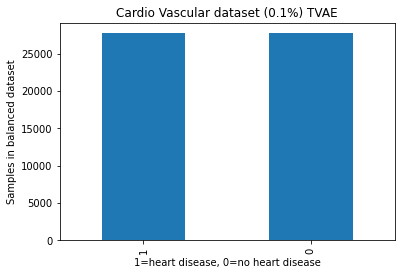

In [95]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (0.1%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [96]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [97]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69     27743
           1       0.70      0.64      0.67     27743

    accuracy                           0.68     55486
   macro avg       0.68      0.68      0.68     55486
weighted avg       0.68      0.68      0.68     55486



In [98]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      6936
           1       0.00      0.43      0.00         7

    accuracy                           0.72      6943
   macro avg       0.50      0.58      0.42      6943
weighted avg       1.00      0.72      0.84      6943



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


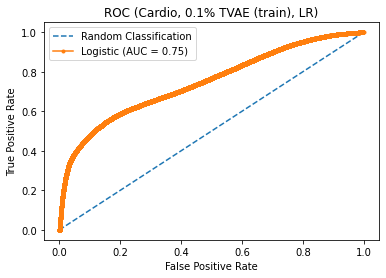

In [99]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.593


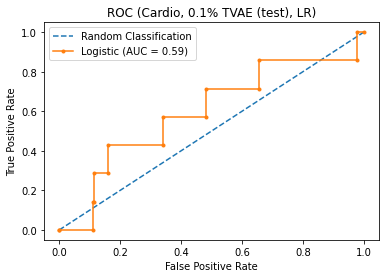

In [100]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [101]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     27743
           1       0.98      0.97      0.98     27743

    accuracy                           0.98     55486
   macro avg       0.98      0.98      0.98     55486
weighted avg       0.98      0.98      0.98     55486



In [102]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6936
           1       0.00      0.00      0.00         7

    accuracy                           0.98      6943
   macro avg       0.50      0.49      0.49      6943
weighted avg       1.00      0.98      0.99      6943



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.995


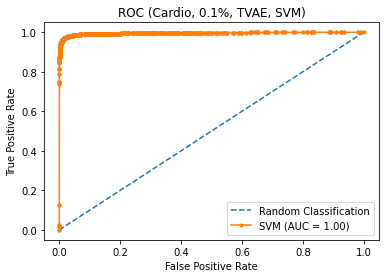

In [103]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.324


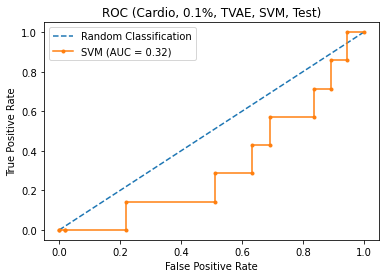

In [104]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [105]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.05614	validation_0-logloss:0.61355	validation_1-error:0.00101	validation_1-logloss:0.61317
[1]	validation_0-error:0.05614	validation_0-logloss:0.54840	validation_1-error:0.00101	validation_1-logloss:0.54725
[2]	validation_0-error:0.05614	validation_0-logloss:0.49419	validation_1-error:0.00101	validation_1-logloss:0.49179
[3]	validation_0-error:0.05614	validation_0-logloss:0.44781	validation_1-error:0.00101	validation_1-logloss:0.44499
[4]	validation_0-error:0.05614	validation_0-logloss:0.40872	validation_1-error:0.00101	validation_1-logloss:0.40446
[5]	validation_0-error:0.05614	validation_0-logloss:0.37457	validation_1-error:0.00101	validation_1-logloss:0.36972
[6]	validation_0-error:0.05614	validation_0-logloss:0.34547	validation_1-error:0.00101	validation_1-logloss:0.33911
[7]	validation_0-error:0.05614	validation_0-logloss:0.31947	validation_1-error:0.00101	validation_1-logloss:0.31244
[8]	validation_0-error:0.04837	validation_0-logloss:0.29721	validation_1

[71]	validation_0-error:0.01002	validation_0-logloss:0.04090	validation_1-error:0.00418	validation_1-logloss:0.03822
[72]	validation_0-error:0.00988	validation_0-logloss:0.04040	validation_1-error:0.00418	validation_1-logloss:0.03773
[73]	validation_0-error:0.00975	validation_0-logloss:0.03979	validation_1-error:0.00418	validation_1-logloss:0.03724
[74]	validation_0-error:0.00952	validation_0-logloss:0.03855	validation_1-error:0.00432	validation_1-logloss:0.03633
[75]	validation_0-error:0.00930	validation_0-logloss:0.03753	validation_1-error:0.00461	validation_1-logloss:0.03547
[76]	validation_0-error:0.00917	validation_0-logloss:0.03715	validation_1-error:0.00475	validation_1-logloss:0.03517
[77]	validation_0-error:0.00912	validation_0-logloss:0.03669	validation_1-error:0.00461	validation_1-logloss:0.03488
[78]	validation_0-error:0.00905	validation_0-logloss:0.03639	validation_1-error:0.00461	validation_1-logloss:0.03465
[79]	validation_0-error:0.00896	validation_0-logloss:0.03619	val

[141]	validation_0-error:0.00593	validation_0-logloss:0.02237	validation_1-error:0.00418	validation_1-logloss:0.02485
[142]	validation_0-error:0.00586	validation_0-logloss:0.02228	validation_1-error:0.00418	validation_1-logloss:0.02475
[143]	validation_0-error:0.00586	validation_0-logloss:0.02219	validation_1-error:0.00418	validation_1-logloss:0.02470
[144]	validation_0-error:0.00584	validation_0-logloss:0.02209	validation_1-error:0.00418	validation_1-logloss:0.02467
[145]	validation_0-error:0.00582	validation_0-logloss:0.02198	validation_1-error:0.00418	validation_1-logloss:0.02467
[146]	validation_0-error:0.00579	validation_0-logloss:0.02190	validation_1-error:0.00418	validation_1-logloss:0.02463
[147]	validation_0-error:0.00573	validation_0-logloss:0.02184	validation_1-error:0.00418	validation_1-logloss:0.02458
[148]	validation_0-error:0.00577	validation_0-logloss:0.02177	validation_1-error:0.00418	validation_1-logloss:0.02458
[149]	validation_0-error:0.00568	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27743
           1       1.00      0.99      1.00     27743

    accuracy                           1.00     55486
   macro avg       1.00      1.00      1.00     55486
weighted avg       1.00      1.00      1.00     55486



In [107]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       0.00      0.00      0.00         7

    accuracy                           1.00      6943
   macro avg       0.50      0.50      0.50      6943
weighted avg       1.00      1.00      1.00      6943



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=1.000


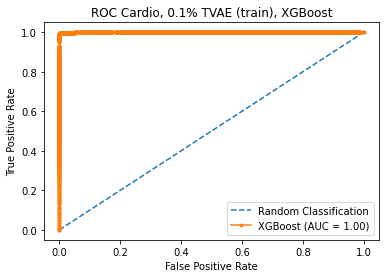

In [108]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.632


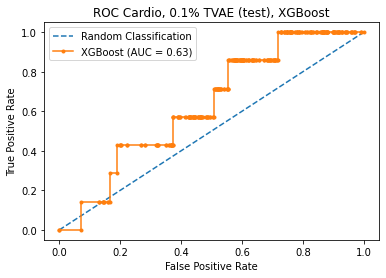

In [109]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [110]:
ctgan_df_1 = df_train[df_train['cardio'] == 1]
ctgan_df_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_df_0.sample(n = 100)
train_df_sm = ctgan_0_sm.append(ctgan_df_1)
train_df_sm['cardio'].value_counts()

0    100
1     29
Name: cardio, dtype: int64

In [112]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(100)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    28
Name: cardio, dtype: int64

In [113]:
train_df_sm1 = train_df_sm.append(samples)

In [114]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(100)
samples = samples[samples['cardio'] ==1.0]
train_df_sm2 = train_df_sm1.append(samples)
train_df_sm2['cardio'].value_counts()

1    101
0    100
Name: cardio, dtype: int64

In [115]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(150)
samples = samples[samples['cardio'] ==1.0]
train_df_sm3 = train_df_sm2.append(samples)
train_df_sm3['cardio'].value_counts()

1    174
0    100
Name: cardio, dtype: int64

In [116]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(200)
samples = samples[samples['cardio'] ==1.0]
train_df_sm4 = train_df_sm3.append(samples)
train_df_sm4['cardio'].value_counts()

1    295
0    100
Name: cardio, dtype: int64

In [117]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(400)
samples = samples[samples['cardio'] ==1.0]
train_df_sm5 = train_df_sm4.append(samples)
train_df_sm5['cardio'].value_counts()

1    570
0    100
Name: cardio, dtype: int64

In [118]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(600)
samples = samples[samples['cardio'] ==1.0]
train_df_sm6 = train_df_sm5.append(samples)
train_df_sm6['cardio'].value_counts()

1    1085
0     100
Name: cardio, dtype: int64

In [119]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(800)
samples = samples[samples['cardio'] ==1.0]
train_df_sm7 = train_df_sm6.append(samples)
train_df_sm7['cardio'].value_counts()

1    1774
0     100
Name: cardio, dtype: int64

In [120]:
ctgan_df_1_1 = train_df_sm7[train_df_sm7['cardio'] == 1]
ctgan_0_med = ctgan_df_0.sample(n = 3500)
train_df_med = ctgan_0_med.append(ctgan_df_1_1)
train_df_med['cardio'].value_counts()

0    3500
1    1774
Name: cardio, dtype: int64

In [121]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2000)
samples = samples[samples['cardio'] ==1.0]
train_df_med1 = train_df_med.append(samples)
train_df_med1['cardio'].value_counts()

0    3500
1    2661
Name: cardio, dtype: int64

In [122]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2500)
samples = samples[samples['cardio'] ==1.0]
train_df_med2 = train_df_med1.append(samples)
train_df_med2['cardio'].value_counts()

1    4017
0    3500
Name: cardio, dtype: int64

In [123]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2500)
samples = samples[samples['cardio'] ==1.0]
train_df_med3 = train_df_med2.append(samples)
train_df_med3['cardio'].value_counts()

1    5617
0    3500
Name: cardio, dtype: int64

In [124]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3500)
samples = samples[samples['cardio'] ==1.0]
train_df_med4 = train_df_med3.append(samples)
train_df_med4['cardio'].value_counts()

1    7694
0    3500
Name: cardio, dtype: int64

In [125]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3750)
samples = samples[samples['cardio'] ==1.0]
train_df_med5 = train_df_med4.append(samples)
train_df_med5['cardio'].value_counts()

1    10140
0     3500
Name: cardio, dtype: int64

In [126]:
ctgan_df1_med = train_df_med5[train_df_med5['cardio'] == 1]
ctgan_0_med = ctgan_df_0.sample(n = 13500)
train_df_1med = ctgan_0_med.append(ctgan_df1_med)
train_df_1med['cardio'].value_counts()

0    13500
1    10140
Name: cardio, dtype: int64

In [127]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_1med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(10750)
samples = samples[samples['cardio'] ==1.0]
train_df_1med1 = train_df_1med.append(samples)
train_df_1med1['cardio'].value_counts()

1    15551
0    13500
Name: cardio, dtype: int64

In [128]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_1med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(12750)
samples = samples[samples['cardio'] ==1.0]
train_df_1med2 = train_df_1med1.append(samples)
train_df_1med2['cardio'].value_counts()

1    23047
0    13500
Name: cardio, dtype: int64

In [129]:
ctgan_df1_lg = train_df_1med2[train_df_1med2['cardio'] == 1]
ctgan_0_lg = ctgan_df_0.sample(n = 20000)
train_df_1lg = ctgan_0_lg.append(ctgan_df1_lg)
train_df_1lg['cardio'].value_counts()

1    23047
0    20000
Name: cardio, dtype: int64

In [130]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_1lg, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(20750)
samples = samples[samples['cardio'] ==1.0]
train_df_lg1 = train_df_1lg.append(samples)
train_df_lg1['cardio'].value_counts()

1    35742
0    20000
Name: cardio, dtype: int64

In [131]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_lg1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(21750)
samples = samples[samples['cardio'] ==1.0]
train_df_lg2 = train_df_lg1.append(samples)
train_df_lg2['cardio'].value_counts()

1    53247
0    20000
Name: cardio, dtype: int64

In [132]:
ctgan_df_1 = train_df_lg2[train_df_lg2['cardio'] == 1]
train_df_1_bal = ctgan_df_1.sample(n = 27743)
ctgan_df_0 = df_train[df_train['cardio'] == 0]
df_train_bal = train_df_1_bal.append(ctgan_df_0)

In [133]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [135]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79     27743
           1       0.83      0.67      0.74     27743

    accuracy                           0.77     55486
   macro avg       0.78      0.77      0.77     55486
weighted avg       0.78      0.77      0.77     55486



In [137]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      6936
           1       0.00      0.00      0.00         7

    accuracy                           0.86      6943
   macro avg       0.50      0.43      0.46      6943
weighted avg       1.00      0.86      0.92      6943



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.834


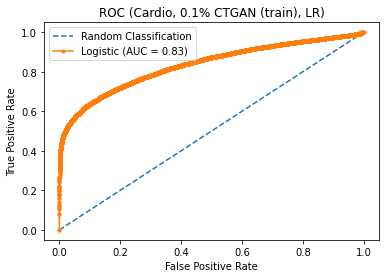

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.554


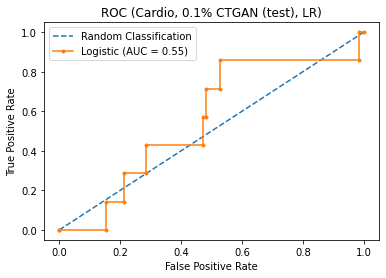

In [139]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     27743
           1       0.93      0.80      0.86     27743

    accuracy                           0.87     55486
   macro avg       0.88      0.87      0.87     55486
weighted avg       0.88      0.87      0.87     55486



In [141]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6936
           1       0.00      0.14      0.00         7

    accuracy                           0.94      6943
   macro avg       0.50      0.54      0.49      6943
weighted avg       1.00      0.94      0.97      6943



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.935


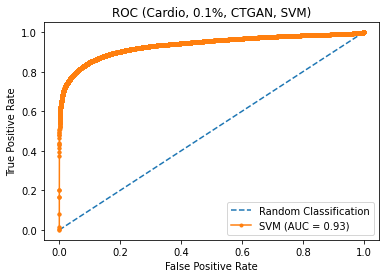

In [142]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.500


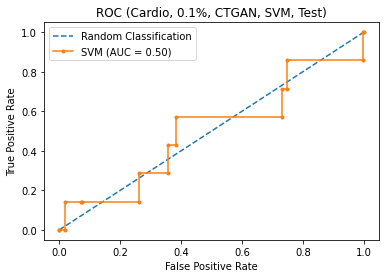

In [143]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 0.1%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [144]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [145]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.16840	validation_0-logloss:0.63948	validation_1-error:0.21720	validation_1-logloss:0.63905
[1]	validation_0-error:0.07214	validation_0-logloss:0.58084	validation_1-error:0.02333	validation_1-logloss:0.57908
[2]	validation_0-error:0.06557	validation_0-logloss:0.53643	validation_1-error:0.05156	validation_1-logloss:0.53393
[3]	validation_0-error:0.06357	validation_0-logloss:0.50572	validation_1-error:0.02463	validation_1-logloss:0.50146
[4]	validation_0-error:0.07014	validation_0-logloss:0.47898	validation_1-error:0.02333	validation_1-logloss:0.47332
[5]	validation_0-error:0.07047	validation_0-logloss:0.45442	validation_1-error:0.02448	validation_1-logloss:0.44709
[6]	validation_0-error:0.06457	validation_0-logloss:0.42247	validation_1-error:0.02492	validation_1-logloss:0.41493
[7]	validation_0-error:0.06553	validation_0-logloss:0.40358	validation_1-error:0.02722	validation_1-logloss:0.39462
[8]	validation_0-error:0.05902	validation_0-logloss:0.37763	validation_1

[71]	validation_0-error:0.02916	validation_0-logloss:0.10032	validation_1-error:0.02117	validation_1-logloss:0.09608
[72]	validation_0-error:0.02923	validation_0-logloss:0.09972	validation_1-error:0.02160	validation_1-logloss:0.09549
[73]	validation_0-error:0.02927	validation_0-logloss:0.09903	validation_1-error:0.02117	validation_1-logloss:0.09478
[74]	validation_0-error:0.02902	validation_0-logloss:0.09842	validation_1-error:0.02117	validation_1-logloss:0.09430
[75]	validation_0-error:0.02882	validation_0-logloss:0.09774	validation_1-error:0.02132	validation_1-logloss:0.09387
[76]	validation_0-error:0.02858	validation_0-logloss:0.09695	validation_1-error:0.02175	validation_1-logloss:0.09339
[77]	validation_0-error:0.02846	validation_0-logloss:0.09638	validation_1-error:0.02160	validation_1-logloss:0.09285
[78]	validation_0-error:0.02819	validation_0-logloss:0.09470	validation_1-error:0.02189	validation_1-logloss:0.09153
[79]	validation_0-error:0.02799	validation_0-logloss:0.09409	val

[141]	validation_0-error:0.01932	validation_0-logloss:0.06525	validation_1-error:0.01988	validation_1-logloss:0.06835
[142]	validation_0-error:0.01919	validation_0-logloss:0.06515	validation_1-error:0.01988	validation_1-logloss:0.06825
[143]	validation_0-error:0.01912	validation_0-logloss:0.06487	validation_1-error:0.01988	validation_1-logloss:0.06797
[144]	validation_0-error:0.01907	validation_0-logloss:0.06463	validation_1-error:0.01973	validation_1-logloss:0.06770
[145]	validation_0-error:0.01903	validation_0-logloss:0.06445	validation_1-error:0.01973	validation_1-logloss:0.06757
[146]	validation_0-error:0.01919	validation_0-logloss:0.06420	validation_1-error:0.01959	validation_1-logloss:0.06734
[147]	validation_0-error:0.01889	validation_0-logloss:0.06378	validation_1-error:0.01944	validation_1-logloss:0.06694
[148]	validation_0-error:0.01880	validation_0-logloss:0.06357	validation_1-error:0.01930	validation_1-logloss:0.06679
[149]	validation_0-error:0.01865	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27743
           1       0.99      0.98      0.98     27743

    accuracy                           0.98     55486
   macro avg       0.98      0.98      0.98     55486
weighted avg       0.98      0.98      0.98     55486



In [147]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6936
           1       0.00      0.00      0.00         7

    accuracy                           0.98      6943
   macro avg       0.50      0.49      0.50      6943
weighted avg       1.00      0.98      0.99      6943



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.998


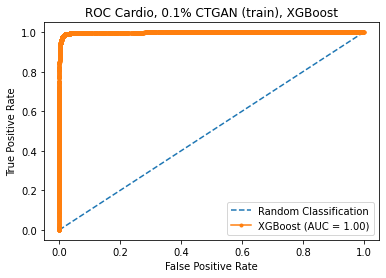

In [148]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.756


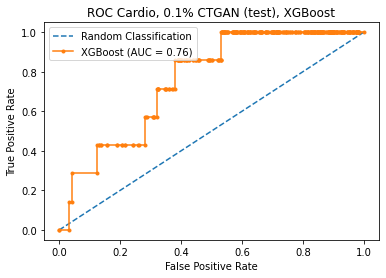

In [149]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 0.1% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()